# Capstone Project: Understanding Ohio Voting Precincts

## Introduction

In the 2016 U.S. Presidential election, Donald J. Trump famously won the electoral college vote (although he lost the popular vote), despite the popularly held convention that he couldn't win, and was behind in most predictive polls. Some have said that the media and people on the left of the political spectrum just did not want to believe that Trump could possibly win, and therefore ignored what was evident in the statistical polling data. However, the polls really did show a strong preference for Clinton over Trump. It's unclear as to why the polls were so wrong, but begs the question: are there other ways to explain the way a state, district, or precinct votes?

In theory, the President of the United States makes policy and guides the nation in tangible and intangible ways. Therefore, understanding how the U.S. electorate votes for the President has consequences for everyone. There are innumerable ways to do this, but this work examines the stereotype that rural areas vote Republican and urban areas vote Democrat. 

## Data Acquisition, Cleaning & Exploration

In order to make the problem of "rural" versus "urban" voting more manageable, the focus has been narrowed from the whole country down to the swing-state of Ohio only. We need three different sets of data: (1) Ohio precinct-level raw vote counts; (2) Ohio precinct shapes/boundaries in latitude/longitude format; and, (3) some sort of data reflecting the rural or urban nature of the precinct. 

#### Data: Precinct Shapes & Raw Vote Counts

I was shocked to find that raw precinct-level voting data information is not publicly available from state or federal agencies. In fact, only aggregated voting district counts (districts are made up of precincts) are available. After much online sleuthing, I tracked down the data I needed from the Metric Geometry and Gerrymandering Group (MGGG). The main goal of the MGGG is actually to "find out what type of data \[they\] could obtain from the individual counties in Ohio on their precinct boundaries, and to work towards turning that into a unified statewide shapefile." Available from their GitHub repository (https://github.com/mggg/ohio-precincts), the MGGG provides a GeoPandas (http://geopandas.org) geopackage shape file containing raw votes and shape coordinates for each precinct. Only a handful of precincts were unable to be developed, and so, are not included in the analysis that follows.

So let's take a look at this GeoPandas data:

In [1]:
# import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# adjust pandas display properties
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 40) # had to limit for readability w/ polygon values

In [3]:
# read in the manually downloaded geopackage data file
precincts_gdf = gpd.read_file("precincts_results.gpkg")

In [10]:
# check it out
print(precincts_gdf.shape)
print(precincts_gdf.columns)
precincts_gdf.head()

(10592, 38)
Index(['PRECINCT', 'COUNTY', 'global_id', 'COUNTYGEOID10',
       'PRECINCT_election_results', 'PRECINCTCODE_election_results',
       'PRECINCT_misfit', 'county_name', 'precinct_code', 'region_name',
       'media_market', 'pres_16_registered_voters', 'pres_16_total_voters',
       'pres_16_turnout_percentage', 'pres_16_james_jerome_bell_wi',
       'pres_16_michael_bickelmeyer_wi', 'pres_16_darrell_l_castle_wi',
       'pres_16_hillary_clinton_d', 'pres_16_richard_duncan',
       'pres_16_cherunda_fox_wi', 'pres_16_ben_hartnell_wi',
       'pres_16_tom_hoefling_wi', 'pres_16_bruce_e_jaynes_wi',
       'pres_16_gary_johnson', 'pres_16_chris_keniston_wi',
       'pres_16_barry_kirschner_wi', 'pres_16_laurence_kotlikoff_wi',
       'pres_16_joseph_maldonado_wi', 'pres_16_michael_andrew_maturen_wi',
       'pres_16_evan_mc_mullin_wi', 'pres_16_monica_moorehead_wi',
       'pres_16_joe_schriner_wi', 'pres_16_mike_smith_wi',
       'pres_16_jill_stein_g', 'pres_16_josiah_r_stro

,PRECINCT,COUNTY,global_id,COUNTYGEOID10,PRECINCT_election_results,PRECINCTCODE_election_results,PRECINCT_misfit,county_name,precinct_code,region_name,media_market,pres_16_registered_voters,pres_16_total_voters,pres_16_turnout_percentage,pres_16_james_jerome_bell_wi,pres_16_michael_bickelmeyer_wi,pres_16_darrell_l_castle_wi,pres_16_hillary_clinton_d,pres_16_richard_duncan,pres_16_cherunda_fox_wi,pres_16_ben_hartnell_wi,pres_16_tom_hoefling_wi,pres_16_bruce_e_jaynes_wi,pres_16_gary_johnson,pres_16_chris_keniston_wi,pres_16_barry_kirschner_wi,pres_16_laurence_kotlikoff_wi,pres_16_joseph_maldonado_wi,pres_16_michael_andrew_maturen_wi,pres_16_evan_mc_mullin_wi,pres_16_monica_moorehead_wi,pres_16_joe_schriner_wi,pres_16_mike_smith_wi,pres_16_jill_stein_g,pres_16_josiah_r_stroh_wi,pres_16_douglas_w_thomson_wi,pres_16_donald_j_trump_r,geometry
0,GALLIPOLIS CITY 1,gallia,4179.0,39053.0,GALLIPOLIS CITY 1,AAA,None,Gallia,AAA,Southeast,Charleston,601.0,386.0,64.23,0.0,0.0,0.0,100.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,267.0,(POLYGON ((394208.1309668442 4296804...
1,GALLIPOLIS CITY 3,gallia,4180.0,39053.0,GALLIPOLIS CITY 3,AAB,None,Gallia,AAB,Southeast,Charleston,1113.0,675.0,60.65,0.0,0.0,0.0,177.0,5.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,449.0,(POLYGON ((399776.4066106104 4299391...
2,GALLIPOLIS CITY 2,gallia,4181.0,39053.0,GALLIPOLIS CITY 2,AAE,None,Gallia,AAE,Southeast,Charleston,582.0,393.0,67.53,0.0,0.0,0.0,113.0,3.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,247.0,(POLYGON ((395684.3247016144 4297527...
3,ADDISON TOWNSHIP,gallia,4182.0,39053.0,ADDISON TWP,AAG,None,Gallia,AAG,Southeast,Charleston,1357.0,984.0,72.51,0.0,0.0,0.0,167.0,12.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,752.0,(POLYGON ((399263.2164539802 4309896...
4,CHESHIRE TOWNSHIP,gallia,4183.0,39053.0,CHESHIRE TWP,AAI,None,Gallia,AAI,Southeast,Charleston,616.0,429.0,69.64,0.0,0.0,0.0,81.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,330.0,(POLYGON ((394490.6016695436 4310216...


As we can see, in this dataframe, we now have the first and second data sets we require for the proposed analysis. Each row contains precinct information, followed by raw vote counts, and the final column contains the geopackage shape data. The geopackage shape data provides location data to define the boundaries of each precinct. In the following section, we will be acquiring venue (restaurants, stores, etc.) data for each precinct. In order to do this, we will need a central location data point for each precinct. Therefore, we calculate the precinct centroid using the precinct boundary data.

In [11]:
# convert geocoding to classic lat/long (need for calls to Foursquare)
print("Original Coordinate Reference System (CRS): ",precincts_gdf.crs)
precincts_gdf = precincts_gdf.to_crs(epsg=4326)
print("NEW Coordinate Reference System (CRS): ",precincts_gdf.crs)

Original Coordinate Reference System (CRS):  {'init': 'epsg:2958'}
NEW Coordinate Reference System (CRS):  {'init': 'epsg:4326', 'no_defs': True}


To make sure we have done this correctly, the following code identifies a small sample of precincts which contain 'Napoleon' in the name, and plots the corresponding precincts with their centroids.

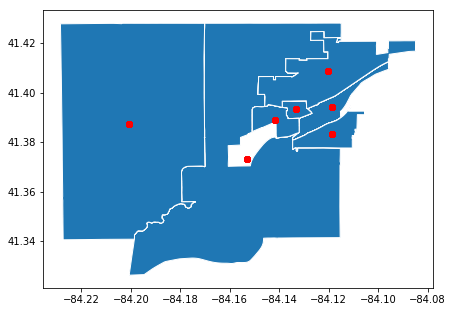

In [12]:
# look at only precincts that make up the *Napoleon* group of precincts
Napoleon_df = precincts_gdf[precincts_gdf["PRECINCT"]=='Napoleon'].copy()

# allocate empty lists for latitude and longitude of each of these precincts
Nap_lon = []
Nap_lat = []

# loop over all precincts Napoleon
for i in range(0,Napoleon_df.shape[0]):
    lon = Napoleon_df.iloc[i]["geometry"].centroid.coords[0][0]
    lat = Napoleon_df.iloc[i]["geometry"].centroid.coords[0][1]
    #print(lon, lat)
    Nap_lon.append(lon)
    Nap_lat.append(lat)
    
# convert lists to dataframes
Nap_lon_df = pd.DataFrame(Nap_lon)
Nap_lat_df = pd.DataFrame(Nap_lat)
#print(Nap_lon_df.shape)
#print(type(Nap_lon_df))
Nap_lon_df.head()

# reset row indices (index) so that index matches on columns to be added
Napoleon_df.reset_index(inplace=True)

# add lon/lat columns to original Napoleon_df dataframe to plot
Napoleon_df["centroid_lon"] = Nap_lon_df
Napoleon_df["centroid_lat"] = Nap_lat_df
#print(Napoleon_df.shape)
Napoleon_df.head()

# plot Napoleon precincts
Napoleon_df.plot(figsize=[7,7], edgecolor='white')

# plot centroid of each Napoleon precincts
for i in range(0,Napoleon_df.shape[0]):
        
    plt.scatter(Napoleon_df.iloc[i]["centroid_lon"], 
                Napoleon_df.iloc[i]["centroid_lat"], 
                color='r')

So, let's apply this approach to the whole dataframe. But first we must do a bit of cleaning.

In [13]:
# indices columns containing raw vote counts
i_start = precincts_gdf.columns.get_loc("pres_16_james_jerome_bell_wi")
i_end = precincts_gdf.columns.get_loc("pres_16_donald_j_trump_r")

# drop any row that has a null/NaN/inf value in ANY of the vote count columns
for i in range(i_start,i_end+1):
    precincts_gdf = precincts_gdf[~pd.isnull(precincts_gdf.iloc[:,i])].copy()
    
# reset row index values to for easy looping AND to add new columns (index values must match)
precincts_gdf.reset_index(inplace=True)

# remove COLUMN named 'index'
precincts_gdf.drop('index', axis=1, inplace=True)

# only keep rows with non-empty geometry cells (make copy to avoid slice overwriting)
ohio_df = precincts_gdf[~precincts_gdf["geometry"].is_empty].copy()

In [14]:
# check
print(ohio_df.shape)
ohio_df.head()

(10295, 38)


,PRECINCT,COUNTY,global_id,COUNTYGEOID10,PRECINCT_election_results,PRECINCTCODE_election_results,PRECINCT_misfit,county_name,precinct_code,region_name,media_market,pres_16_registered_voters,pres_16_total_voters,pres_16_turnout_percentage,pres_16_james_jerome_bell_wi,pres_16_michael_bickelmeyer_wi,pres_16_darrell_l_castle_wi,pres_16_hillary_clinton_d,pres_16_richard_duncan,pres_16_cherunda_fox_wi,pres_16_ben_hartnell_wi,pres_16_tom_hoefling_wi,pres_16_bruce_e_jaynes_wi,pres_16_gary_johnson,pres_16_chris_keniston_wi,pres_16_barry_kirschner_wi,pres_16_laurence_kotlikoff_wi,pres_16_joseph_maldonado_wi,pres_16_michael_andrew_maturen_wi,pres_16_evan_mc_mullin_wi,pres_16_monica_moorehead_wi,pres_16_joe_schriner_wi,pres_16_mike_smith_wi,pres_16_jill_stein_g,pres_16_josiah_r_stroh_wi,pres_16_douglas_w_thomson_wi,pres_16_donald_j_trump_r,geometry
0,GALLIPOLIS CITY 1,gallia,4179.0,39053.0,GALLIPOLIS CITY 1,AAA,None,Gallia,AAA,Southeast,Charleston,601.0,386.0,64.23,0.0,0.0,0.0,100.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,267.0,(POLYGON ((-82.21852200042079 38.813...
1,GALLIPOLIS CITY 3,gallia,4180.0,39053.0,GALLIPOLIS CITY 3,AAB,None,Gallia,AAB,Southeast,Charleston,1113.0,675.0,60.65,0.0,0.0,0.0,177.0,5.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,449.0,(POLYGON ((-82.15477500020693 38.837...
2,GALLIPOLIS CITY 2,gallia,4181.0,39053.0,GALLIPOLIS CITY 2,AAE,None,Gallia,AAE,Southeast,Charleston,582.0,393.0,67.53,0.0,0.0,0.0,113.0,3.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,247.0,(POLYGON ((-82.20163199954212 38.820...
3,ADDISON TOWNSHIP,gallia,4182.0,39053.0,ADDISON TWP,AAG,None,Gallia,AAG,Southeast,Charleston,1357.0,984.0,72.51,0.0,0.0,0.0,167.0,12.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,752.0,(POLYGON ((-82.16222800051644 38.932...
4,CHESHIRE TOWNSHIP,gallia,4183.0,39053.0,CHESHIRE TWP,AAI,None,Gallia,AAI,Southeast,Charleston,616.0,429.0,69.64,0.0,0.0,0.0,81.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,330.0,(POLYGON ((-82.21732899953564 38.934...


Calculate the centroids for all precincts and add to dataframe.

In [15]:
# allocate empty lists for latitude and longitude
oh_lon = []
oh_lat = []

# loop over all precincts Napoleon
for i in range(0,ohio_df.shape[0]):
    lon = ohio_df.iloc[i]["geometry"].centroid.coords[0][0]
    lat = ohio_df.iloc[i]["geometry"].centroid.coords[0][1]
    oh_lon.append(lon)
    oh_lat.append(lat)
    
# convert lists to dataframes
oh_lon_df = pd.DataFrame(oh_lon)
oh_lat_df = pd.DataFrame(oh_lat)
#print(Nap_lon_df.shape, Nap_lat_df.shape)

In [16]:
# add lon/lat columns to original Napoleon_df dataframe to plot
ohio_df["centroid_lon"] = oh_lon_df
ohio_df["centroid_lat"] = oh_lat_df

In [17]:
# check
print(ohio_df.shape)
ohio_df.head()

(10295, 40)


,PRECINCT,COUNTY,global_id,COUNTYGEOID10,PRECINCT_election_results,PRECINCTCODE_election_results,PRECINCT_misfit,county_name,precinct_code,region_name,media_market,pres_16_registered_voters,pres_16_total_voters,pres_16_turnout_percentage,pres_16_james_jerome_bell_wi,pres_16_michael_bickelmeyer_wi,pres_16_darrell_l_castle_wi,pres_16_hillary_clinton_d,pres_16_richard_duncan,pres_16_cherunda_fox_wi,pres_16_ben_hartnell_wi,pres_16_tom_hoefling_wi,pres_16_bruce_e_jaynes_wi,pres_16_gary_johnson,pres_16_chris_keniston_wi,pres_16_barry_kirschner_wi,pres_16_laurence_kotlikoff_wi,pres_16_joseph_maldonado_wi,pres_16_michael_andrew_maturen_wi,pres_16_evan_mc_mullin_wi,pres_16_monica_moorehead_wi,pres_16_joe_schriner_wi,pres_16_mike_smith_wi,pres_16_jill_stein_g,pres_16_josiah_r_stroh_wi,pres_16_douglas_w_thomson_wi,pres_16_donald_j_trump_r,geometry,centroid_lon,centroid_lat
0,GALLIPOLIS CITY 1,gallia,4179.0,39053.0,GALLIPOLIS CITY 1,AAA,None,Gallia,AAA,Southeast,Charleston,601.0,386.0,64.23,0.0,0.0,0.0,100.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,267.0,(POLYGON ((-82.21852200042079 38.813...,-82.213177,38.806066
1,GALLIPOLIS CITY 3,gallia,4180.0,39053.0,GALLIPOLIS CITY 3,AAB,None,Gallia,AAB,Southeast,Charleston,1113.0,675.0,60.65,0.0,0.0,0.0,177.0,5.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,449.0,(POLYGON ((-82.15477500020693 38.837...,-82.177677,38.824904
2,GALLIPOLIS CITY 2,gallia,4181.0,39053.0,GALLIPOLIS CITY 2,AAE,None,Gallia,AAE,Southeast,Charleston,582.0,393.0,67.53,0.0,0.0,0.0,113.0,3.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,247.0,(POLYGON ((-82.20163199954212 38.820...,-82.211522,38.816566
3,ADDISON TOWNSHIP,gallia,4182.0,39053.0,ADDISON TWP,AAG,None,Gallia,AAG,Southeast,Charleston,1357.0,984.0,72.51,0.0,0.0,0.0,167.0,12.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,752.0,(POLYGON ((-82.16222800051644 38.932...,-82.178235,38.890661
4,CHESHIRE TOWNSHIP,gallia,4183.0,39053.0,CHESHIRE TWP,AAI,None,Gallia,AAI,Southeast,Charleston,616.0,429.0,69.64,0.0,0.0,0.0,81.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,330.0,(POLYGON ((-82.21732899953564 38.934...,-82.157784,38.969485


Ok, this is all we need for the next section. However, let's do a little bit more work here by creating a binary "winner" column (0=Trump, 1=Clinton) and plot all precincts colored (red=Trump, blue=Clinton).

In [18]:
# list of columns that contain vote counts
vote_columns = ['pres_16_james_jerome_bell_wi',
       'pres_16_michael_bickelmeyer_wi', 'pres_16_darrell_l_castle_wi',
       'pres_16_hillary_clinton_d', 'pres_16_richard_duncan',
       'pres_16_cherunda_fox_wi', 'pres_16_ben_hartnell_wi',
       'pres_16_tom_hoefling_wi', 'pres_16_bruce_e_jaynes_wi',
       'pres_16_gary_johnson', 'pres_16_chris_keniston_wi',
       'pres_16_barry_kirschner_wi', 'pres_16_laurence_kotlikoff_wi',
       'pres_16_joseph_maldonado_wi', 'pres_16_michael_andrew_maturen_wi',
       'pres_16_evan_mc_mullin_wi', 'pres_16_monica_moorehead_wi',
       'pres_16_joe_schriner_wi', 'pres_16_mike_smith_wi',
       'pres_16_jill_stein_g', 'pres_16_josiah_r_stroh_wi',
       'pres_16_douglas_w_thomson_wi', 'pres_16_donald_j_trump_r']

# create column with lead vote winner name
ohio_df["winner"] = ohio_df[vote_columns].astype(int).idxmax(axis='columns')

# create empty list containing for winner as binary: 0/1 == Trump/Hillary
win_bi = []

# assign binary values...
for i in range(0,ohio_df.shape[0]):
    if (ohio_df.iloc[i]["winner"] == "pres_16_donald_j_trump_r"):
        win_bi.append(0)
    elif (ohio_df.iloc[i]["winner"] == "pres_16_hillary_clinton_d"):
        win_bi.append(1)
    else:
        print("else @ i=",i)
        #win_bi.append(2)
        
#win_bi
ohio_df["winner_binary"] = win_bi

In [28]:
# add column 'Precinct_ID' == index
ohio_df["Precinct_ID"] = ohio_df.index

# move "Precinct_ID" to first column
ohio_df = ohio_df.set_index('Precinct_ID').reset_index()

In [29]:
# check final dataframe (last 5 columns are relevant for plotting)
print(ohio_df.shape)
ohio_df.head()

(10295, 43)


,Precinct_ID,PRECINCT,COUNTY,global_id,COUNTYGEOID10,PRECINCT_election_results,PRECINCTCODE_election_results,PRECINCT_misfit,county_name,precinct_code,region_name,media_market,pres_16_registered_voters,pres_16_total_voters,pres_16_turnout_percentage,pres_16_james_jerome_bell_wi,pres_16_michael_bickelmeyer_wi,pres_16_darrell_l_castle_wi,pres_16_hillary_clinton_d,pres_16_richard_duncan,pres_16_cherunda_fox_wi,pres_16_ben_hartnell_wi,pres_16_tom_hoefling_wi,pres_16_bruce_e_jaynes_wi,pres_16_gary_johnson,pres_16_chris_keniston_wi,pres_16_barry_kirschner_wi,pres_16_laurence_kotlikoff_wi,pres_16_joseph_maldonado_wi,pres_16_michael_andrew_maturen_wi,pres_16_evan_mc_mullin_wi,pres_16_monica_moorehead_wi,pres_16_joe_schriner_wi,pres_16_mike_smith_wi,pres_16_jill_stein_g,pres_16_josiah_r_stroh_wi,pres_16_douglas_w_thomson_wi,pres_16_donald_j_trump_r,geometry,centroid_lon,centroid_lat,winner,winner_binary
0,0,GALLIPOLIS CITY 1,gallia,4179.0,39053.0,GALLIPOLIS CITY 1,AAA,None,Gallia,AAA,Southeast,Charleston,601.0,386.0,64.23,0.0,0.0,0.0,100.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,267.0,(POLYGON ((394208.1309668442 4296804...,-82.213177,38.806066,pres_16_donald_j_trump_r,0
1,1,GALLIPOLIS CITY 3,gallia,4180.0,39053.0,GALLIPOLIS CITY 3,AAB,None,Gallia,AAB,Southeast,Charleston,1113.0,675.0,60.65,0.0,0.0,0.0,177.0,5.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,449.0,(POLYGON ((399776.4066106104 4299391...,-82.177677,38.824904,pres_16_donald_j_trump_r,0
2,2,GALLIPOLIS CITY 2,gallia,4181.0,39053.0,GALLIPOLIS CITY 2,AAE,None,Gallia,AAE,Southeast,Charleston,582.0,393.0,67.53,0.0,0.0,0.0,113.0,3.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,247.0,(POLYGON ((395684.3247016143 4297527...,-82.211522,38.816566,pres_16_donald_j_trump_r,0
3,3,ADDISON TOWNSHIP,gallia,4182.0,39053.0,ADDISON TWP,AAG,None,Gallia,AAG,Southeast,Charleston,1357.0,984.0,72.51,0.0,0.0,0.0,167.0,12.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,752.0,(POLYGON ((399263.2164539802 4309896...,-82.178235,38.890661,pres_16_donald_j_trump_r,0
4,4,CHESHIRE TOWNSHIP,gallia,4183.0,39053.0,CHESHIRE TWP,AAI,None,Gallia,AAI,Southeast,Charleston,616.0,429.0,69.64,0.0,0.0,0.0,81.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,330.0,(POLYGON ((394490.6016695436 4310216...,-82.157784,38.969485,pres_16_donald_j_trump_r,0


In [26]:
# convert back to original CRS for improved plotting
ohio_df = ohio_df.to_crs(epsg=2958)

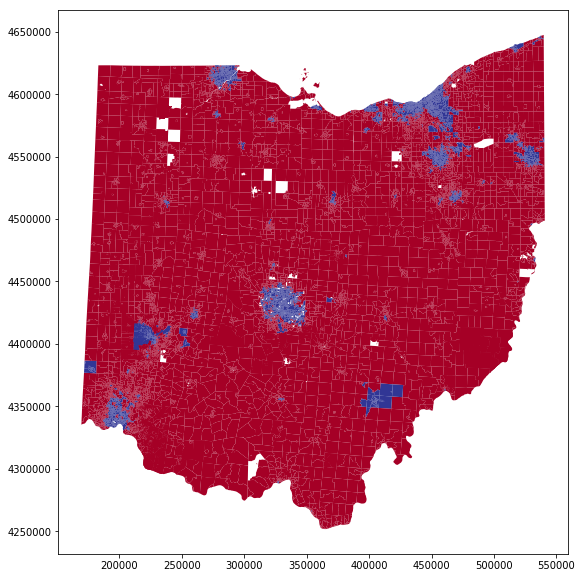

In [27]:
# plot (red=Trump, blue=Clinton)
ohio_df.plot(column='winner_binary', figsize=[10,10], cmap='RdYlBu')

#### Data: Defining Rural and Urban Precincts

The third data set we need must somehow characterize "rural" and "urban" voting areas. To do this, we will utilize Foursquare (www.foursquare.com) venue data to generate feature sets for each precinct. The feature sets will contain be comprised of the category types (i.e. "Italian Restaurant", "Gas Station", "Auto Mechanic", etc.) for the venues found in each precinct. Calls to the Foursquare API return JSON information, which we will tranform into a Pandas dataframe for analysis. Although we won't initially label precincts as rural or urban, once we have done some analysis, we will see if there are voting patterns for precincts with very few, or zero, venues (presumed to be rural), versus precincts with many venues (presumed to be urban).

Let's take a look at the Foursquare data:

In [5]:
# import libraries
import json # JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [6]:
# Foursqaure credentials and version info
CLIENT_ID = 'LP5VHPFD4PUKCOMHHJALFLDBF5INH5IUO45AYV4RZXDE505R' # your Foursquare ID
CLIENT_SECRET = 'VXXTJLOK5SACL4AMNMONAATB3UR4JSOST2OLF4PBJZMPE0RG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentails:
CLIENT_ID: LP5VHPFD4PUKCOMHHJALFLDBF5INH5IUO45AYV4RZXDE505R
CLIENT_SECRET:VXXTJLOK5SACL4AMNMONAATB3UR4JSOST2OLF4PBJZMPE0RG


In [7]:
# Create a function to "explore" (get venues for) all the precincts
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT = 100):
    
    # allocate empty venues list
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        #results = requests.get(url).json()["response"]['groups'][0]['items']
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            print(name)
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Precinct_ID', 
                  'Precinct Latitude', 
                  'Precinct Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

It should be noted that "The Foursquare API has a limit of 950 Regular API Calls per day". However, by verifying your Foursquare account with a credit card (which is not charged), this limit is raised to 99,500 calls per day. The following raw text cell shows the code to request the Foursquare data, but is not used here. Instead I have previously run this code and saved the Foursquare data to CSV file, since getting this information from the Foursquare API is time consuming.

Load the Foursquare venue data that I had previously save to a CSV file:

In [8]:
# load the cached Foursqaure data (rather make calls to FQ API again)
precinct_venues = pd.read_csv("precinct_venues_FQ.csv")

In [22]:
# drop 'Unnamed: 0' column
precinct_venues.drop(['Unnamed: 0'], axis=1, inplace=True)

# rename column to match column in ohio_df
precinct_venues.rename(columns={"Precinct": "Precinct_ID"}, inplace=True)

In [23]:
# check it out
print(precinct_venues.shape)
print(precinct_venues.columns)
precinct_venues.head()

(22507, 7)
Index(['Precinct_ID', 'Precinct Latitude', 'Precinct Longitude', 'Venue',
       'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')


,Precinct_ID,Precinct Latitude,Precinct Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,38.806066,-82.213177,BP,38.805446,-82.213247,Gas Station
1,0,38.806066,-82.213177,Foodland,38.806978,-82.209135,Market
2,0,38.806066,-82.213177,Remo's Hotdogs,38.806038,-82.208049,Italian Restaurant
3,0,38.806066,-82.213177,Uncle Kenny's Saloon,38.806973,-82.207941,Bar
4,1,38.824904,-82.177677,Cliffside Golf Course,38.826450,-82.179614,Golf Course


As we can see, each row contains venue location and category data. Each venue is mapped to the corresponding precinct. Some precincts may have multiple venues, so are shown in multiple rows. Some precincts may not have any venues, so are not present in this dataframe. 

## Remaining Analytical Work

To complete this project, the following tasks remain:

- Clean dataframes.

- Convert venue category data into one-hot feature set.

- Merge the precinct vote/shape dataframe with the precinct one-hot venue dataframe.

- Apply k-means clustering algorthim to merged dataframe.

- Analyze results of clustering. 

- If results are good, characterize the clusters based on their common features. 

- If the results are not good, consider feature selection, application of other machine learing techniques (other clustering algorithms, and classification algortihms, changing the radius in which venues are found for each precinct).